In [100]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix
from statistics import mode
from sklearn.linear_model import LogisticRegression

In [76]:
dataFrame = pd.read_csv('space_decay.csv')
dataFrame

,CCSDS_OMM_VERS,COMMENT,CREATION_DATE,ORIGINATOR,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,...,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,DECAY_DATE,FILE,GP_ID,TLE_LINE0,TLE_LINE1,TLE_LINE2
0,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T06:46:11,18 SPCS,ARIANE 42P+ DEB,1992-072J,EARTH,TEME,UTC,SGP4,...,MEDIUM,FR,1992.0,FRGUI,NaN,3195178,188614016,0 ARIANE 42P+ DEB,1 26741U 92072J 21304.94919376 .00000883 0...,2 26741 7.7156 90.2410 6528926 243.1216 38...
1,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T04:58:37,18 SPCS,SL-8 DEB,1979-028C,EARTH,TEME,UTC,SGP4,...,SMALL,CIS,1979.0,PKMTR,NaN,3194950,188593285,0 SL-8 DEB,1 26743U 79028C 21304.68908982 .00000079 0...,2 26743 82.9193 299.1120 0030720 158.9093 201...
2,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T06:26:11,18 SPCS,GSAT 1,2001-015A,EARTH,TEME,UTC,SGP4,...,LARGE,IND,2001.0,SRI,NaN,3195026,188609573,0 GSAT 1,1 26745U 01015A 21305.22411368 -.00000165 0...,2 26745 12.1717 16.5368 0237386 250.1248 146...
3,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-31T18:07:15,18 SPCS,CZ-4 DEB,1999-057MB,EARTH,TEME,UTC,SGP4,...,SMALL,PRC,1999.0,TSC,NaN,3194431,188556894,0 CZ-4 DEB,1 26754U 99057MB 21304.46625230 .00002265 0...,2 26754 98.4781 8.7205 0060618 37.3771 323...
4,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T04:58:37,18 SPCS,CZ-4 DEB,1999-057MC,EARTH,TEME,UTC,SGP4,...,SMALL,PRC,1999.0,TSC,NaN,3194950,188592541,0 CZ-4 DEB,1 26755U 99057MC 21304.74081807 .00002610 0...,2 26755 98.4232 122.0724 0062255 345.1605 27...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14367,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-29T18:22:04,18 SPCS,TBA - TO BE ASSIGNED,NaN,EARTH,TEME,UTC,SGP4,...,NaN,NaN,NaN,NaN,NaN,3191411,188414015,0 TBA - TO BE ASSIGNED,1 87970U 21285.56271139 +.00354808 +0...,2 87970 99.0098 214.6827 0011899 219.1613 140...
14368,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-31T18:06:35,18 SPCS,TBA - TO BE ASSIGNED,NaN,EARTH,TEME,UTC,SGP4,...,NaN,NaN,NaN,NaN,NaN,3194430,188550573,0 TBA - TO BE ASSIGNED,1 89171U 21304.27943186 +.00020950 +0...,2 89171 99.0272 141.1159 0055597 76.8926 283...
14369,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-31T18:07:15,18 SPCS,TBA - TO BE ASSIGNED,NaN,EARTH,TEME,UTC,SGP4,...,NaN,NaN,NaN,NaN,NaN,3194431,188561362,0 TBA - TO BE ASSIGNED,1 T0007U 21304.15669309 -.00000068 0...,2 T0007 31.9916 262.9339 0566728 162.7824 199...
14370,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-31T18:07:15,18 SPCS,TBA - TO BE ASSIGNED,NaN,EARTH,TEME,UTC,SGP4,...,NaN,NaN,NaN,NaN,NaN,3194431,188561387,0 TBA - TO BE ASSIGNED,1 T0207U 21304.37554955 .00000690 0...,2 T0207 98.6758 348.3068 0058220 187.0288 173...


In [77]:
newDataFrame = dataFrame[["LAUNCH_DATE","OBJECT_TYPE","RCS_SIZE","COUNTRY_CODE","APOAPSIS","PERIAPSIS","MEAN_ANOMALY","ECCENTRICITY","MEAN_MOTION","INCLINATION","RA_OF_ASC_NODE","ARG_OF_PERICENTER","PERIOD","SEMIMAJOR_AXIS"]]
newDataFrame

,LAUNCH_DATE,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,APOAPSIS,PERIAPSIS,MEAN_ANOMALY,ECCENTRICITY,MEAN_MOTION,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,PERIOD,SEMIMAJOR_AXIS
0,1992.0,DEBRIS,MEDIUM,FR,27784.871,796.095,38.7796,0.652893,2.921700,7.7156,90.2410,243.1216,492.864,20668.618
1,1979.0,DEBRIS,SMALL,CIS,1002.507,957.299,201.3337,0.003072,13.754973,82.9193,299.1120,158.9093,104.689,7358.038
2,2001.0,PAYLOAD,LARGE,IND,35797.696,33841.738,146.2900,0.023739,1.038224,12.1717,16.5368,250.1248,1386.984,41197.852
3,1999.0,DEBRIS,SMALL,PRC,679.465,594.417,323.1632,0.006062,14.775907,98.4781,8.7205,37.3771,97.456,7015.076
4,1999.0,DEBRIS,SMALL,PRC,697.039,609.491,27.6061,0.006226,14.724482,98.4232,122.0724,345.1605,97.796,7031.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14367,NaN,TBA,NaN,NaN,434.844,418.650,140.8771,0.001190,15.465781,99.0098,214.6827,219.1613,93.109,6804.882
14368,NaN,TBA,NaN,NaN,615.599,538.263,283.8489,0.005560,14.967557,99.0272,141.1159,76.8926,96.208,6955.066
14369,NaN,TBA,NaN,NaN,1732.692,862.672,199.2858,0.056673,12.909691,31.9916,262.9339,162.7824,111.544,7675.817
14370,NaN,TBA,NaN,NaN,851.919,768.219,173.0081,0.005822,14.245319,98.6758,348.3068,187.0288,101.086,7188.204


# ADDING A NEW FEATURE : CENTER FOCUS DISTANCE OF PARABOLA which is the multiplication of Eccentricity and the semimajor axis of the orbital object.

In [78]:
newDataFrame["CENTRE_FOCUS_DIST"] = dataFrame['SEMIMAJOR_AXIS']*dataFrame['ECCENTRICITY']

C:\Users\User\AppData\Local\Temp\ipykernel_14268\3392770277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDataFrame["CENTRE_FOCUS_DIST"] = dataFrame['SEMIMAJOR_AXIS']*dataFrame['ECCENTRICITY']


In [79]:
newDataFrame

,LAUNCH_DATE,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,APOAPSIS,PERIAPSIS,MEAN_ANOMALY,ECCENTRICITY,MEAN_MOTION,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,PERIOD,SEMIMAJOR_AXIS,CENTRE_FOCUS_DIST
0,1992.0,DEBRIS,MEDIUM,FR,27784.871,796.095,38.7796,0.652893,2.921700,7.7156,90.2410,243.1216,492.864,20668.618,13494.387744
1,1979.0,DEBRIS,SMALL,CIS,1002.507,957.299,201.3337,0.003072,13.754973,82.9193,299.1120,158.9093,104.689,7358.038,22.603893
2,2001.0,PAYLOAD,LARGE,IND,35797.696,33841.738,146.2900,0.023739,1.038224,12.1717,16.5368,250.1248,1386.984,41197.852,977.979329
3,1999.0,DEBRIS,SMALL,PRC,679.465,594.417,323.1632,0.006062,14.775907,98.4781,8.7205,37.3771,97.456,7015.076,42.523988
4,1999.0,DEBRIS,SMALL,PRC,697.039,609.491,27.6061,0.006226,14.724482,98.4232,122.0724,345.1605,97.796,7031.400,43.773981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14367,NaN,TBA,NaN,NaN,434.844,418.650,140.8771,0.001190,15.465781,99.0098,214.6827,219.1613,93.109,6804.882,8.097129
14368,NaN,TBA,NaN,NaN,615.599,538.263,283.8489,0.005560,14.967557,99.0272,141.1159,76.8926,96.208,6955.066,38.668080
14369,NaN,TBA,NaN,NaN,1732.692,862.672,199.2858,0.056673,12.909691,31.9916,262.9339,162.7824,111.544,7675.817,435.010272
14370,NaN,TBA,NaN,NaN,851.919,768.219,173.0081,0.005822,14.245319,98.6758,348.3068,187.0288,101.086,7188.204,41.849652


In [80]:
MeanAnomaly = newDataFrame["MEAN_ANOMALY"]
Eccentricity = newDataFrame["ECCENTRICITY"]
CentreFocusDist = newDataFrame["CENTRE_FOCUS_DIST"]
SemiMajorAxis = newDataFrame["SEMIMAJOR_AXIS"]

In [81]:
newDataFrame["YEAR"] = 2022

C:\Users\User\AppData\Local\Temp\ipykernel_14268\3329845262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDataFrame["YEAR"] = 2022


In [82]:
newDataFrame

,LAUNCH_DATE,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,APOAPSIS,PERIAPSIS,MEAN_ANOMALY,ECCENTRICITY,MEAN_MOTION,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,PERIOD,SEMIMAJOR_AXIS,CENTRE_FOCUS_DIST,YEAR
0,1992.0,DEBRIS,MEDIUM,FR,27784.871,796.095,38.7796,0.652893,2.921700,7.7156,90.2410,243.1216,492.864,20668.618,13494.387744,2022
1,1979.0,DEBRIS,SMALL,CIS,1002.507,957.299,201.3337,0.003072,13.754973,82.9193,299.1120,158.9093,104.689,7358.038,22.603893,2022
2,2001.0,PAYLOAD,LARGE,IND,35797.696,33841.738,146.2900,0.023739,1.038224,12.1717,16.5368,250.1248,1386.984,41197.852,977.979329,2022
3,1999.0,DEBRIS,SMALL,PRC,679.465,594.417,323.1632,0.006062,14.775907,98.4781,8.7205,37.3771,97.456,7015.076,42.523988,2022
4,1999.0,DEBRIS,SMALL,PRC,697.039,609.491,27.6061,0.006226,14.724482,98.4232,122.0724,345.1605,97.796,7031.400,43.773981,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14367,NaN,TBA,NaN,NaN,434.844,418.650,140.8771,0.001190,15.465781,99.0098,214.6827,219.1613,93.109,6804.882,8.097129,2022
14368,NaN,TBA,NaN,NaN,615.599,538.263,283.8489,0.005560,14.967557,99.0272,141.1159,76.8926,96.208,6955.066,38.668080,2022
14369,NaN,TBA,NaN,NaN,1732.692,862.672,199.2858,0.056673,12.909691,31.9916,262.9339,162.7824,111.544,7675.817,435.010272,2022
14370,NaN,TBA,NaN,NaN,851.919,768.219,173.0081,0.005822,14.245319,98.6758,348.3068,187.0288,101.086,7188.204,41.849652,2022


# Adding a object age that is just current year - launch date

In [83]:
newDataFrame["OBJECT_AGE"] = newDataFrame.YEAR - newDataFrame.LAUNCH_DATE

C:\Users\User\AppData\Local\Temp\ipykernel_14268\4286200177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDataFrame["OBJECT_AGE"] = newDataFrame.YEAR - newDataFrame.LAUNCH_DATE


In [84]:
newDataFrame

,LAUNCH_DATE,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,APOAPSIS,PERIAPSIS,MEAN_ANOMALY,ECCENTRICITY,MEAN_MOTION,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,PERIOD,SEMIMAJOR_AXIS,CENTRE_FOCUS_DIST,YEAR,OBJECT_AGE
0,1992.0,DEBRIS,MEDIUM,FR,27784.871,796.095,38.7796,0.652893,2.921700,7.7156,90.2410,243.1216,492.864,20668.618,13494.387744,2022,30.0
1,1979.0,DEBRIS,SMALL,CIS,1002.507,957.299,201.3337,0.003072,13.754973,82.9193,299.1120,158.9093,104.689,7358.038,22.603893,2022,43.0
2,2001.0,PAYLOAD,LARGE,IND,35797.696,33841.738,146.2900,0.023739,1.038224,12.1717,16.5368,250.1248,1386.984,41197.852,977.979329,2022,21.0
3,1999.0,DEBRIS,SMALL,PRC,679.465,594.417,323.1632,0.006062,14.775907,98.4781,8.7205,37.3771,97.456,7015.076,42.523988,2022,23.0
4,1999.0,DEBRIS,SMALL,PRC,697.039,609.491,27.6061,0.006226,14.724482,98.4232,122.0724,345.1605,97.796,7031.400,43.773981,2022,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14367,NaN,TBA,NaN,NaN,434.844,418.650,140.8771,0.001190,15.465781,99.0098,214.6827,219.1613,93.109,6804.882,8.097129,2022,NaN
14368,NaN,TBA,NaN,NaN,615.599,538.263,283.8489,0.005560,14.967557,99.0272,141.1159,76.8926,96.208,6955.066,38.668080,2022,NaN
14369,NaN,TBA,NaN,NaN,1732.692,862.672,199.2858,0.056673,12.909691,31.9916,262.9339,162.7824,111.544,7675.817,435.010272,2022,NaN
14370,NaN,TBA,NaN,NaN,851.919,768.219,173.0081,0.005822,14.245319,98.6758,348.3068,187.0288,101.086,7188.204,41.849652,2022,NaN


# Hypothesis testing using normal distribution and chi squared tests

- Checking if size is normally distributed

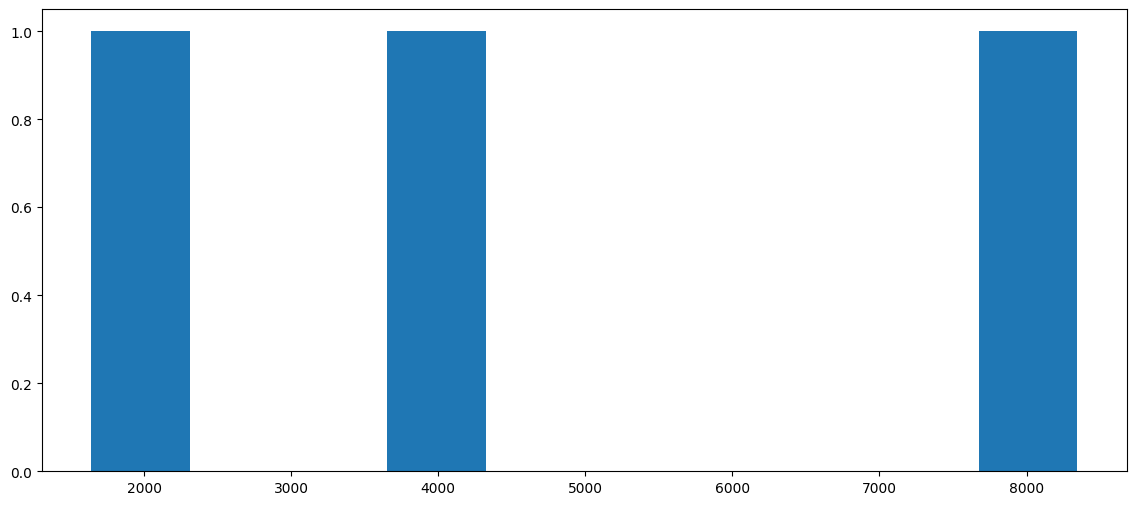

In [85]:
plt.figure(figsize=(14,6))
plotDataFrame = newDataFrame.RCS_SIZE.value_counts()
plt.hist(plotDataFrame)
plt.show()

In [86]:
DataToTest = plotDataFrame
stat, p = shapiro(DataToTest)
print('stat=%.2f, p=%.20f' %(stat,p))
print()

if p>0.05:
    print('Normal distribution')
else:
    print('Not a Normal distribution')

stat=0.98, p=0.73746675252914428711

Normal distribution


- Data is normally distributed with respect to size of debris

# K square normal test on debris size and object type

In [87]:
df3=newDataFrame['OBJECT_TYPE'].value_counts()
DataToTest=df3
stat, p = shapiro(DataToTest)
print('stat=%.2f, p=%.20f' %(stat,p))
print()

if p>0.05:
    print('Normal distribution')
else:
    print('Not a Normal distribution')

stat=0.90, p=0.41902077198028564453

Normal distribution


# CHI squared test to find out if age of debris is dependable on size of debris or independent

In [88]:
dependencyData=pd.crosstab(newDataFrame['RCS_SIZE'],newDataFrame['OBJECT_AGE'],margins=False)
dependencyData

OBJECT_AGE,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0
RCS_SIZE,,,,,,,,,,,,,,,,,,,,,
LARGE,1062,960,221,206,155,117,125,141,131,120,...,0,0,2,0,0,0,0,0,0,0
MEDIUM,330,142,105,105,39,37,29,61,28,48,...,1,0,8,0,0,12,0,1,0,3
SMALL,187,96,138,190,231,53,44,90,65,31,...,65,3,45,5,60,132,8,4,2,21


In [89]:
stat, p, dof, expected = chi2_contingency(dependencyData)
print('stat=%.3f, p=%.3f' %(stat,p))
print()

if p>0.05:
    print('Independent')
else:
    print('Dependent on each other')

stat=9128.883, p=0.000

Dependent on each other


# We get to know that the size of the debris is dependent on the age of the debris

# Apply Algorithm to detect and predict debris size 

In [90]:
debrisData = newDataFrame[newDataFrame["OBJECT_TYPE"] == "DEBRIS"]
debrisData

,LAUNCH_DATE,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,APOAPSIS,PERIAPSIS,MEAN_ANOMALY,ECCENTRICITY,MEAN_MOTION,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,PERIOD,SEMIMAJOR_AXIS,CENTRE_FOCUS_DIST,YEAR,OBJECT_AGE
0,1992.0,DEBRIS,MEDIUM,FR,27784.871,796.095,38.7796,0.652893,2.921700,7.7156,90.2410,243.1216,492.864,20668.618,13494.387744,2022,30.0
1,1979.0,DEBRIS,SMALL,CIS,1002.507,957.299,201.3337,0.003072,13.754973,82.9193,299.1120,158.9093,104.689,7358.038,22.603893,2022,43.0
3,1999.0,DEBRIS,SMALL,PRC,679.465,594.417,323.1632,0.006062,14.775907,98.4781,8.7205,37.3771,97.456,7015.076,42.523988,2022,23.0
4,1999.0,DEBRIS,SMALL,PRC,697.039,609.491,27.6061,0.006226,14.724482,98.4232,122.0724,345.1605,97.796,7031.400,43.773981,2022,23.0
5,1999.0,DEBRIS,SMALL,PRC,824.406,702.671,306.3803,0.008523,14.384765,98.7597,287.9689,54.5300,100.106,7141.674,60.867773,2022,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14327,2018.0,DEBRIS,NaN,US,35024.843,8363.535,352.3326,0.474868,1.845802,11.0703,190.9480,24.2957,780.149,28072.324,13330.653968,2022,4.0
14328,2018.0,DEBRIS,NaN,US,33878.971,7528.413,346.4724,0.486499,1.947986,11.1000,190.7386,42.3158,739.225,27081.827,13175.279045,2022,4.0
14329,2018.0,DEBRIS,NaN,US,37766.952,8171.563,354.6612,0.504225,1.726826,11.6205,188.7505,18.9358,833.900,29347.392,14797.694601,2022,4.0
14330,2018.0,DEBRIS,NaN,US,37600.719,10175.005,277.0792,0.453078,1.648809,10.8285,227.9659,324.3414,873.358,30265.997,13712.857389,2022,4.0


In [91]:
debrisData.RCS_SIZE=debrisData.RCS_SIZE.map({'SMALL':1, 'MEDIUM':2, 'LARGE':3})

debrisData


C:\Users\User\AppData\Local\Temp\ipykernel_14268\116232158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  debrisData.RCS_SIZE=debrisData.RCS_SIZE.map({'SMALL':1, 'MEDIUM':2, 'LARGE':3})


,LAUNCH_DATE,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,APOAPSIS,PERIAPSIS,MEAN_ANOMALY,ECCENTRICITY,MEAN_MOTION,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,PERIOD,SEMIMAJOR_AXIS,CENTRE_FOCUS_DIST,YEAR,OBJECT_AGE
0,1992.0,DEBRIS,2.0,FR,27784.871,796.095,38.7796,0.652893,2.921700,7.7156,90.2410,243.1216,492.864,20668.618,13494.387744,2022,30.0
1,1979.0,DEBRIS,1.0,CIS,1002.507,957.299,201.3337,0.003072,13.754973,82.9193,299.1120,158.9093,104.689,7358.038,22.603893,2022,43.0
3,1999.0,DEBRIS,1.0,PRC,679.465,594.417,323.1632,0.006062,14.775907,98.4781,8.7205,37.3771,97.456,7015.076,42.523988,2022,23.0
4,1999.0,DEBRIS,1.0,PRC,697.039,609.491,27.6061,0.006226,14.724482,98.4232,122.0724,345.1605,97.796,7031.400,43.773981,2022,23.0
5,1999.0,DEBRIS,1.0,PRC,824.406,702.671,306.3803,0.008523,14.384765,98.7597,287.9689,54.5300,100.106,7141.674,60.867773,2022,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14327,2018.0,DEBRIS,NaN,US,35024.843,8363.535,352.3326,0.474868,1.845802,11.0703,190.9480,24.2957,780.149,28072.324,13330.653968,2022,4.0
14328,2018.0,DEBRIS,NaN,US,33878.971,7528.413,346.4724,0.486499,1.947986,11.1000,190.7386,42.3158,739.225,27081.827,13175.279045,2022,4.0
14329,2018.0,DEBRIS,NaN,US,37766.952,8171.563,354.6612,0.504225,1.726826,11.6205,188.7505,18.9358,833.900,29347.392,14797.694601,2022,4.0
14330,2018.0,DEBRIS,NaN,US,37600.719,10175.005,277.0792,0.453078,1.648809,10.8285,227.9659,324.3414,873.358,30265.997,13712.857389,2022,4.0


In [92]:
debrisData.columns

Index(['LAUNCH_DATE', 'OBJECT_TYPE', 'RCS_SIZE', 'COUNTRY_CODE', 'APOAPSIS',
       'PERIAPSIS', 'MEAN_ANOMALY', 'ECCENTRICITY', 'MEAN_MOTION',
       'INCLINATION', 'RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', 'PERIOD',
       'SEMIMAJOR_AXIS', 'CENTRE_FOCUS_DIST', 'YEAR', 'OBJECT_AGE'],
      dtype='object')

# Creating training data from size and other factors and then perform regression to calculate accuracy

In [97]:
X = debrisData[["OBJECT_AGE","CENTRE_FOCUS_DIST","APOAPSIS","PERIAPSIS","MEAN_ANOMALY","MEAN_MOTION","INCLINATION","RA_OF_ASC_NODE","ARG_OF_PERICENTER","PERIOD"]]
y = debrisData["RCS_SIZE"]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 49)

# Performing regression

In [101]:
model = LogisticRegression(max_iter = 500000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(accuracy)

ValueError: Input y contains NaN.